In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pyplot_image_show(image,cmap = 'gray',figsize = (18,9)):
    plt.figure(figsize = figsize)
    plt.imshow(image,cmap='gray')
   # plt.title(str((image.min(),image.max())))
    
def pyplot_comparative_show(image_1,image_2,cmap = 'gray',figsize = (18,9)):
    _,(ax1,ax2) = plt.subplots(1,2,figsize=figsize)
    ax1.imshow(image_1,cmap='gray',vmin=0)
    ax2.imshow(image_2,cmap='gray',vmin=0)
    #ax1.set_title(str((image_1.min(),image_1.max())))
    #ax2.set_title(str((image_2.min(),image_2.max())))
    
def pyplot_comparative_show_3(image_1,image_2,image_3,cmap = 'gray',figsize = (18,9)):
    _,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=figsize)
    ax1.imshow(image_1,cmap='gray',vmin=0)
    ax2.imshow(image_2,cmap='gray',vmin=0)
    ax3.imshow(image_3,cmap='gray',vmin=0)
    #ax1.set_title(str((image_1.min(),image_1.max())))
    #ax2.set_title(str((image_2.min(),image_2.max())))
    #ax3.set_title(str((image_3.min(),image_3.max())))
    
def apply_filter_to_image(image,filter):
    dft = cv2.dft(image,flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    dft_shift = dft_shift * np.dstack([filter] * 2)
    rev_dft = np.fft.ifftshift(dft_shift)
    rev_image = cv2.idft(rev_dft,flags=cv2.DFT_COMPLEX_OUTPUT)
    rev_image_float = cv2.magnitude(rev_image[:,:,0],rev_image[:,:,1])
    return rev_image_float

def find_spectre_of_image(image):
    ffd_image_2 = cv2.dft(np.float64(image_stock),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(ffd_image_2)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    return magnitude_spectrum

def cv2_magn(image):
    return (cv2.magnitude(image[:, :, 0], image[:, :, 1]))

def show_task(image,filter):
    #Calculate DFT of an image
    dft = cv2.dft(image,flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    #Show the default spectrum and the application of filter on a spectrum
    filter_applied_dft_shift = dft_shift * np.dstack([filter] * 2)
    fads_im = cv2.magnitude(filter_applied_dft_shift[:,:,0],filter_applied_dft_shift[:,:,1])
    pyplot_comparative_show(np.log(cv2_magn(dft_shift)),np.log(fads_im))
    #Restore an image
    filtered_image = cv2.idft(np.fft.ifftshift(filter_applied_dft_shift))
    filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])
    pyplot_comparative_show(image,filtered_image)
    #return filtered_imagimage
    

# Load Stock Image

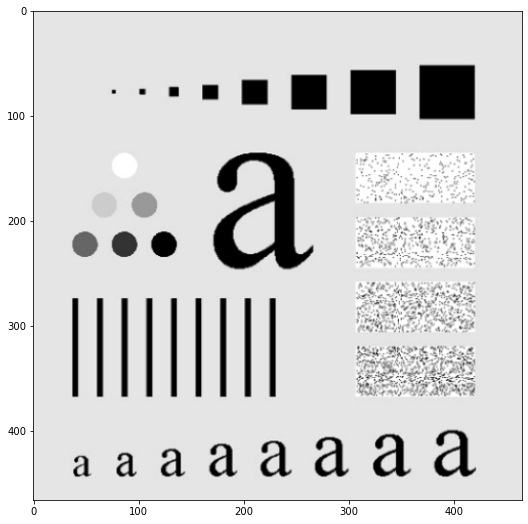

In [2]:
image_stock = cv2.imread("a.png", cv2.IMREAD_GRAYSCALE).astype('float')
pyplot_image_show(image_stock)

# Construct Frequency Filter(ideal, low freq)

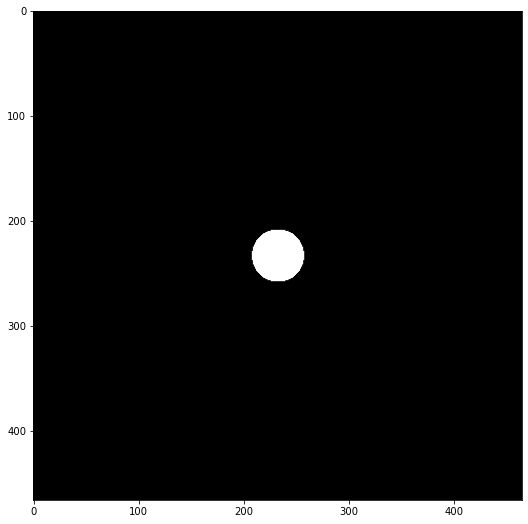

In [14]:
d0 = 25
low_pass_filter = np.zeros_like(image_stock)
x_div = image_stock.shape[0]/2
y_div = image_stock.shape[1]/2
for i in range(image_stock.shape[0]):
    for j in range(image_stock.shape[1]):
        if ((i - x_div)**2+(j-y_div)**2 <= d0**2):
            low_pass_filter[i,j] = 1
low_pass_filter += 1e-100
pyplot_image_show(low_pass_filter)

# Apply Ideal low-frequency Filter

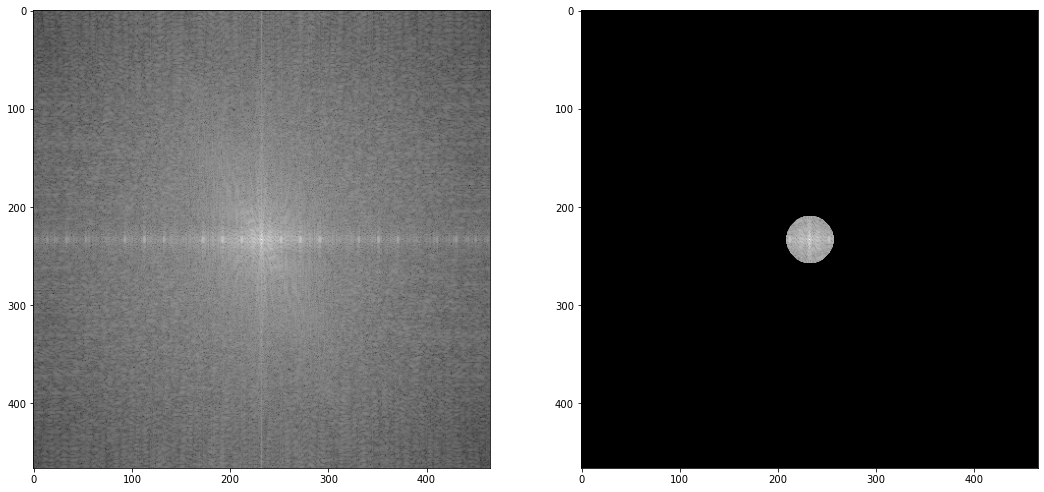

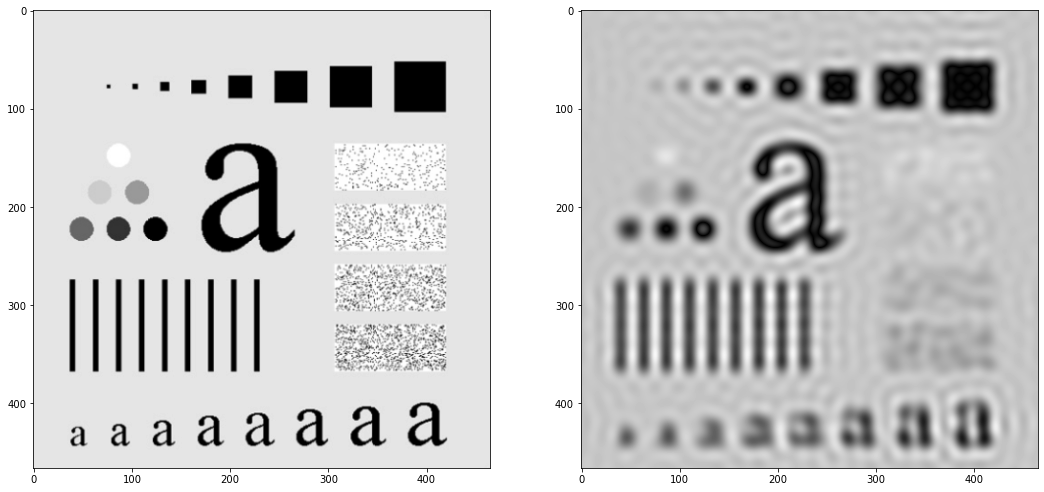

In [15]:
show_task(image_stock,low_pass_filter)

# Construct Ideal high-freq filter

In [16]:
high_pass_filter = 1 - low_pass_filter + 1e-100

# And apply it

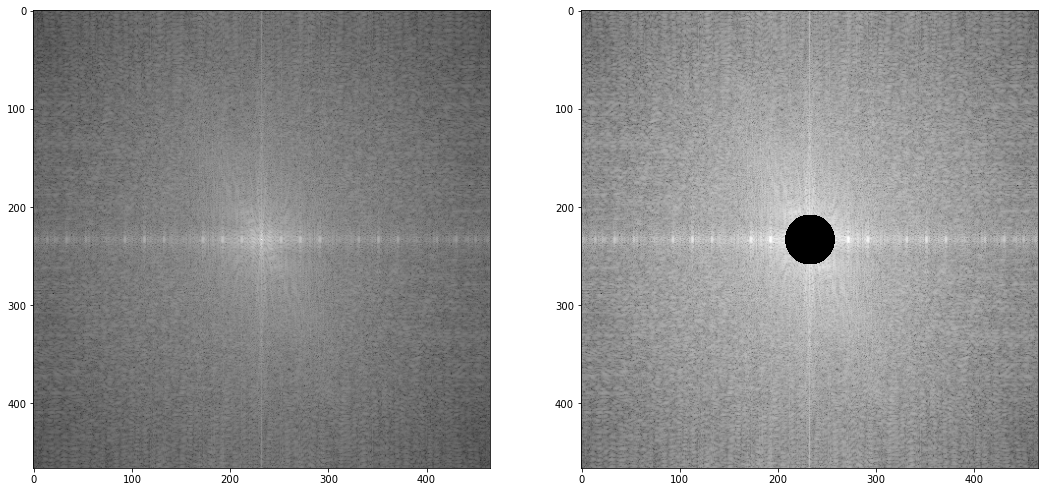

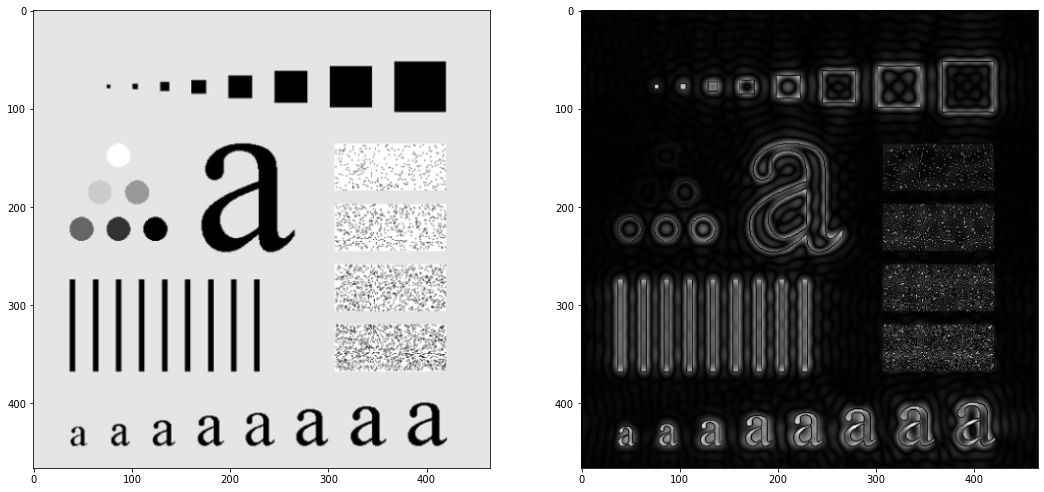

In [17]:
show_task(image_stock,high_pass_filter)

# Construct gaussian low-pass

In [7]:
def calculate_radial_thingy(image):
    width, height = image.shape#Dist to center
    thingy = np.zeros_like(image)
    for x in range(width):
        for y in range(height):
            thingy[x,y] = (x - width // 2) ** 2 + (y - height // 2) ** 2
    return thingy
calculate_radial_thingy(image_stock).shape

(466, 465)

In [8]:
d0 = 400
d=calculate_radial_thingy(image_stock)
low_gauss_f = np.exp(-(d ** 2) / (2 * d0 ** 2)) + 1e-100

# And apply it

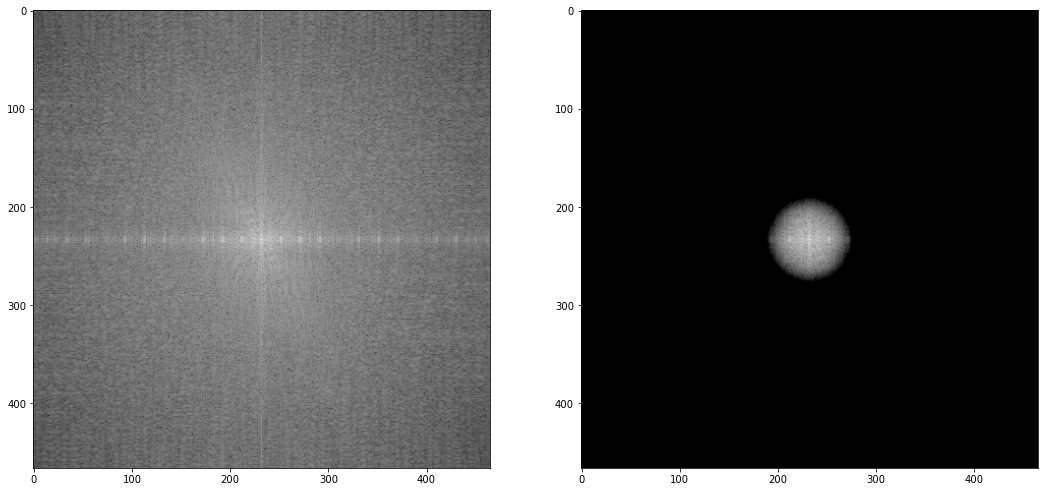

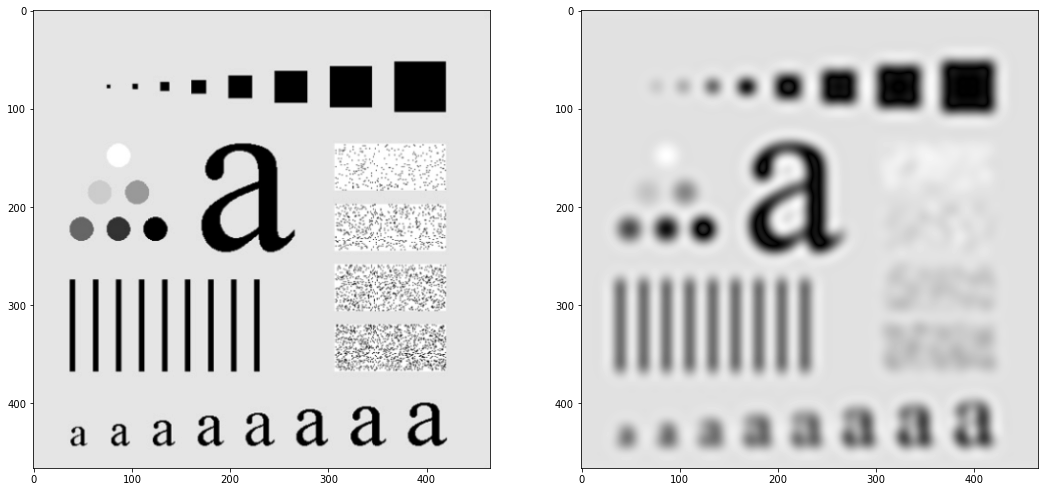

In [9]:
show_task(image_stock,low_gauss_f)

# Construct gaussian high-pass and apply it

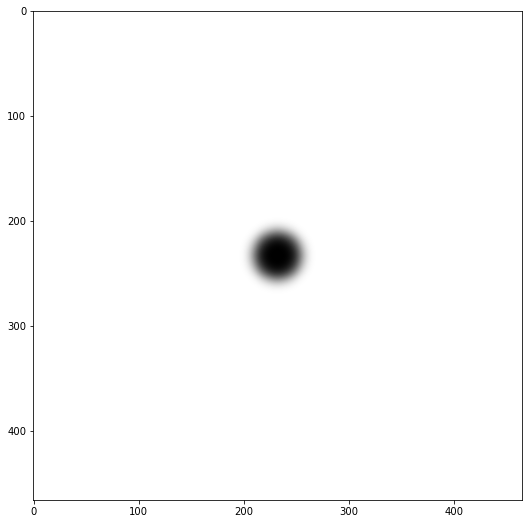

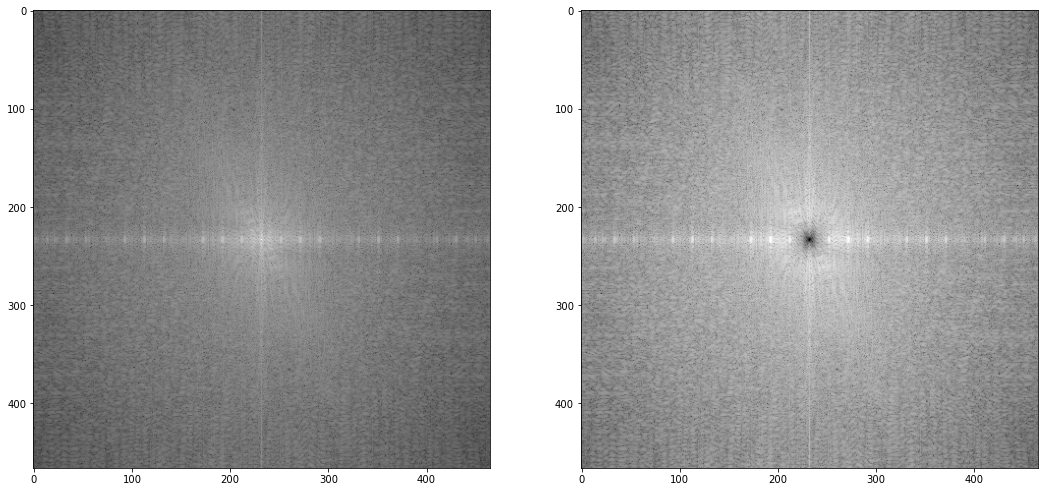

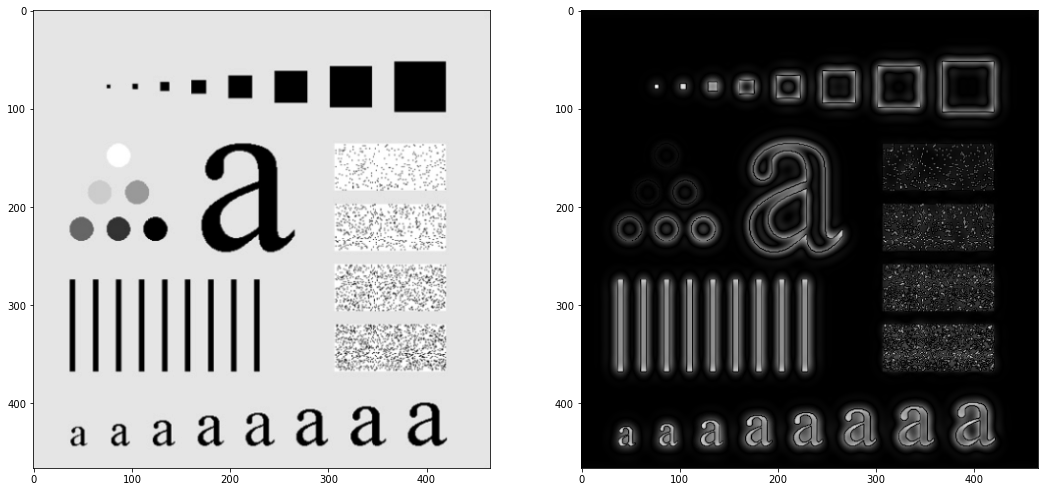

In [10]:
high_gauss_f = (1 - low_gauss_f + 1e-100)
pyplot_image_show(high_gauss_f)
show_task(image_stock,high_gauss_f)

# Construct Batterwort filter(low)

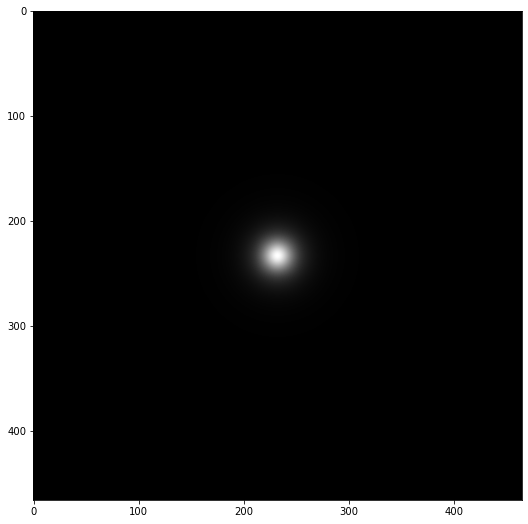

In [11]:
d0 = 400
n =1
d= calculate_radial_thingy(image_stock)
low_batter_f = (1/((1 + d/d0) ** (2*n)))+ 1e-100
pyplot_image_show(low_batter_f)

# Apply it

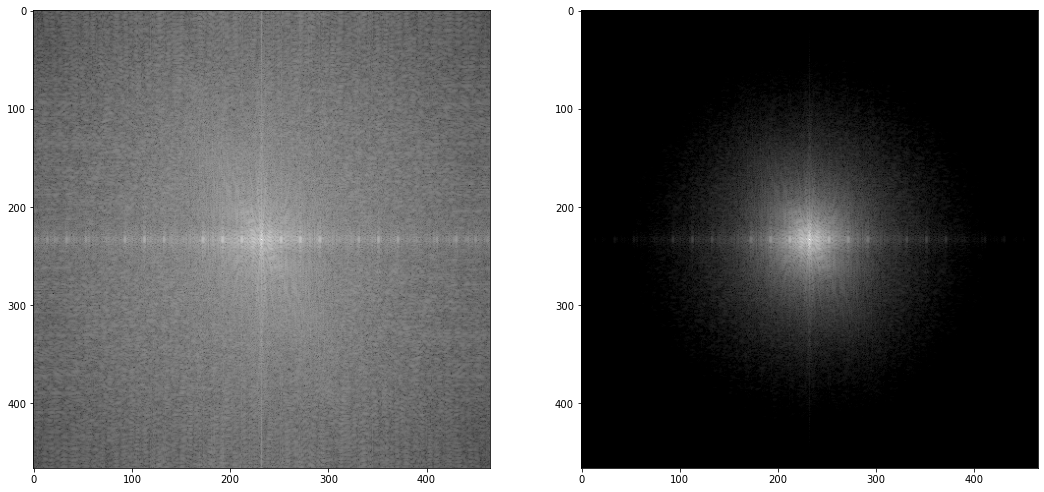

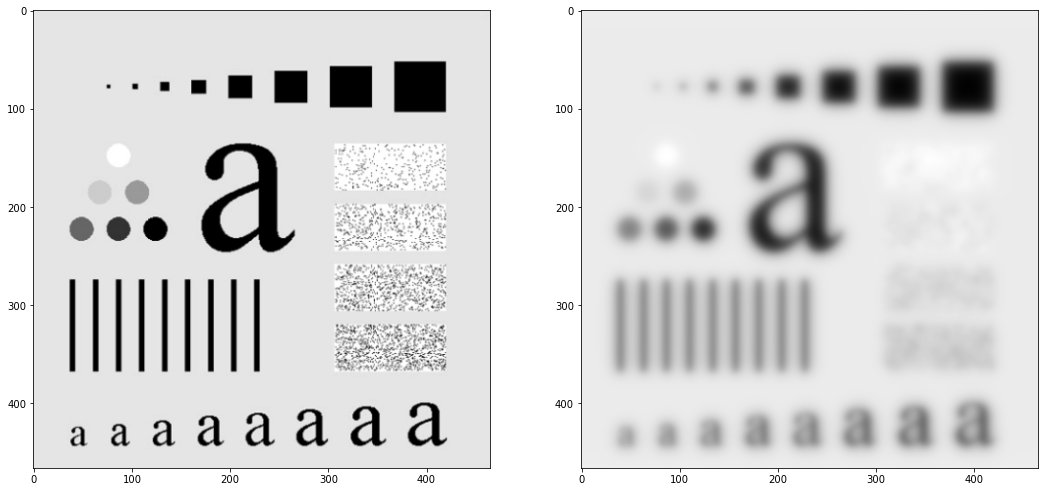

In [12]:
show_task(image_stock,low_batter_f)

# Convert to high and apply

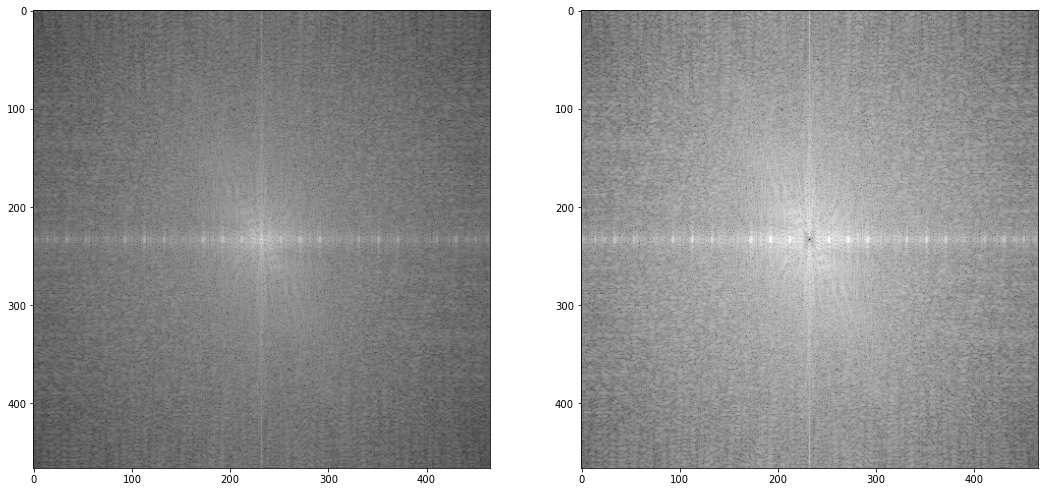

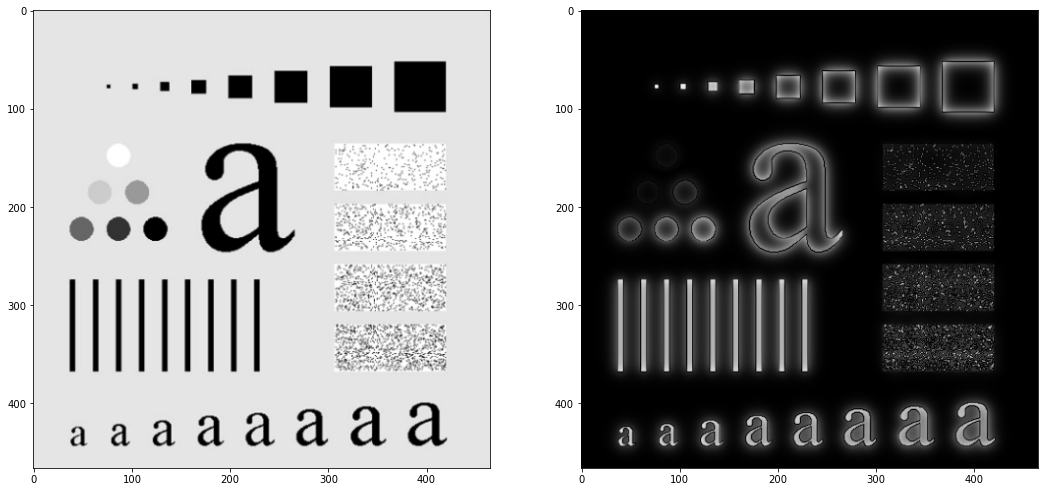

In [13]:
high_batter_f = 1 - low_batter_f + 1e-100
show_task(image_stock,high_batter_f)